## Delivery Hero Project

### Project Objectives

- Perform **Exploratory Data Analysis (EDA)** on the dataset  
- Identify **key trends**, calculate **performance metrics**, and uncover **customer behavior patterns**  
- Provide **data-driven recommendations** to improve the company’s **performance** and **revenue**  


In [2]:
import pandas as pd
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib_venn import venn3

In [5]:
from scipy import stats

In [6]:
df_products = pd.read_csv(r'c:\Users\pc\Desktop\Desk Folders\Data Science\DSAIS 2023-2024\Projects\Delivery Hero ICP\Data\products.csv')

In [7]:
display(df_products)

,master_code,product_name_english,product_description,weight_value,weight_unit,length_in_cm,width_in_cm,height_in_cm,catalog_price_lc,catalog_original_price_lc,...,store_type,vat_rate,safety_stock_days,safety_stock_units,created_at,maximum_sales_quantity,category_english,category_parent_english,is_weightable,join_key_product_table
0,PKD0O4Q1,Adam's Pizza Cheese 200g,Adam's is known for its distinct taste and tex...,400.0,g,0.0,0.0,0.0,700.00,700.0,...,mini_market,0.0,NaN,NaN,2022-02-25 19:02:28.096855 UTC,1,Cheese,Dairy Products,False,16131888-r0rq
1,PK090EM8,Frey Air Freshener Cool Summer 300ml,"Frey air fresheners provides lovely, soothing ...",300.0,g,0.0,0.0,0.0,217.00,217.0,...,darkstores,18.0,NaN,NaN,2021-06-05 11:25:05.334594 UTC,100,Air Fresheners,Cleaning & Laundry,False,8277663-fp8x
2,PK2GVD8X,Wall's Mango Cup 100ml,"Welcome to the Wall's product range, tease you...",100.0,g,0.0,0.0,0.0,80.00,80.0,...,darkstores,18.0,NaN,NaN,2021-03-30 14:30:43.407941 UTC,30,Cups,Ice Cream & Frozen,False,7773760-dk6y
3,PK40CDYT,Hamdard Joshanda 32g,"An effective herbal remedy for Flue, Cough & C...",32.0,g,0.0,0.0,0.0,90.00,90.0,...,darkstores,1.0,NaN,NaN,2021-05-20 13:18:24.515085 UTC,100,Flu & Allergies,Pharmacy,False,35134709-lxyu
4,PK3XJRT4,Olpers Tarka Asli Desi Ghee 500Gm,Olper's Tarrka is premium desi ghee distinct f...,500.0,g,0.0,0.0,0.0,900.00,900.0,...,darkstores,18.0,NaN,NaN,2021-06-17 07:51:03.436647 UTC,100,Ghee,Oil & Ghee,False,8411650-lxyu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,PKN8FTZJ,Rin Washing Powder 1 kg,Rin Powder detergent which makes clothes as br...,1000.0,g,0.0,0.0,0.0,414.00,450.0,...,darkstores,18.0,NaN,NaN,2021-06-05 06:19:22.683154 UTC,12,Laundry Detergent & Pods,Cleaning & Laundry,False,37098413-p3ag
81100,PKNQP47B,Sunlight 2in1 Washing Powder Pink Clean & Jasm...,Transforming the chore of washing clothes into...,850.0,g,0.0,1.0,1.0,178.00,200.0,...,darkstores,18.0,NaN,NaN,2021-06-05 11:22:44.48936 UTC,12,Laundry Detergent & Pods,Cleaning & Laundry,False,8269921-dcu3
81101,MY1U8RQ0,Bonus Tristar Detergent Washing Powder 1000g,Pakistan's No. 1 selling detergent and the cho...,950.0,g,0.0,0.0,0.0,207.00,230.0,...,darkstores,18.0,NaN,NaN,2021-02-02 11:00:25.525558 UTC,4,Laundry Detergent & Pods,Cleaning & Laundry,False,7298726-wqke
81102,62e3a89dda4d001eaa9368a8,Surf Excel Washing Powder 2kg,Buy Detergent Powder & Liquid from foodpanda S...,0.0,NaN,0.0,0.0,0.0,1053.40,1145.0,...,darkstores,0.0,NaN,NaN,2021-06-05 06:19:42.669349 UTC,12,Laundry Detergent & Pods,Cleaning & Laundry,False,8261585-qjk4


In [8]:
df_orders = pd.read_csv(r'c:\Users\pc\Desktop\Desk Folders\Data Science\DSAIS 2023-2024\Projects\Delivery Hero ICP\Data\orders.csv')
display(df_orders)

,customer_code,order_id,order_placed_at,global_product_id,qty_ordered,payment_method,is_sent,is_voucher,is_failed,is_cancelled,failure_owner,delivery_state,is_free_delivery
0,pkljm7ag,qx1u-3mok,2024-02-27 12:05:07 UTC,d49c4c4e-caf2-4e8a-9203-c62d5a8fdd66,1,generic_creditcard,True,False,False,False,NaN,late,False
1,pkdqb1mi,clnz-i6hg,2024-01-25 07:36:14 UTC,25d980c7-fb6e-4d47-a2a7-8ea6fbe1b347,1,generic_creditcard,True,False,False,False,NaN,early,False
2,pkfsf4js,zj7v-mg5m,2023-09-06 14:09:49 UTC,0c743d12-4f14-4625-833e-3b3fafbf67a7,2,cash,True,True,False,False,NaN,late,False
3,b6uxx9tz,z1uc-37wp,2023-07-04 15:19:32 UTC,599e58cc-6e5f-4655-843e-86c322dd6e24,2,card,True,True,False,False,NaN,late,True
4,y0edy1zz,yq19-yjk6,2023-07-25 09:39:29 UTC,fdc421e5-d6d0-4aa8-b7d9-ff8b2517239b,1,card,True,False,False,False,NaN,ontime,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328627,pkmh8nv4,k5ty-mpf4,2023-04-23 14:30:24 UTC,1a293dbf-e84d-4862-a623-883d8a77b09c,1,generic_creditcard,True,False,False,False,NaN,late,False
328628,pkol6rt4,yq19-rsi7,2023-08-04 05:55:44 UTC,edc4dbbf-28b9-48c4-97c4-967a916b9782,1,cash,True,True,False,False,NaN,late,False
328629,w0sfy6ak,dcu3-0kub,2023-06-15 15:53:07 UTC,10765c88-93c1-4042-927f-1a222e493245,4,card,True,False,False,False,NaN,early,False
328630,pk8q3pee,dk6y-l8jh,2023-03-05 06:24:36 UTC,4577b80a-6337-47cd-89ef-a70164523dd0,2,cash,True,False,False,False,NaN,late,False


In [9]:
df_imp = pd.read_csv(r'c:\Users\pc\Desktop\Desk Folders\Data Science\DSAIS 2023-2024\Projects\Delivery Hero ICP\Data\bq-results-20240514-081133-1715676449565.csv', low_memory=False)
display(df_imp)

,global_entity_id,partition_date,session_id,event_action,event_timestamp,app_version,platform,category_id,customer_code,event_origin,...,shop_sponsoring_placement,sub_category_id,swimlane_position,swimlane_title,user_timestamp,vendor_code,is_sponsored,is_clicked,click_type,join_key_product_table
0,FP_PK,2024-03-03,1709493827337.3415567247.hoeqlqyhff,product_choice.opened,2024-03-03 19:25:05.999 UTC,24.3.0,iOS,"cross_sell,cross_sell_similar",pkhg0qzx,cross_sell,...,NaN,NaN,NaN,NaN,NaN,zj7v,0,True,add_cart.clicked,37056275-zj7v
1,FP_PK,2024-03-08,1709902826581.423558692413425365.OErBqEC6xP,product_choice.opened,2024-03-08 13:22:44.264 UTC,24.3.0,Android,NaN,pkio98ck,categorySearchNav__autocomplete,...,NaN,NaN,NaN,NaN,1.709904e+09,ts87,0,True,product_choice.opened,34458627-ts87
2,FP_PK,2024-03-27,1711536599493.2324843897.uyzpkqqjnz,add_cart.clicked,2024-03-27 10:50:21.207 UTC,24.4.2,iOS,"category,aa20e9c9-5c36-4a39-b9f2-513a291c677d",pk8q3pee,category_details,...,NaN,472ecbc9-9a36-413b-8525-cbba07cd87e1,NaN,NaN,NaN,dk6y,0,True,add_cart.clicked,10367777-dk6y
3,FP_PK,2024-03-18,1710760822278.4400263566.nkjfbufuig,add_cart.clicked,2024-03-18 11:21:07.669 UTC,24.3.0,iOS,"cross_sell,cross_sell_similar",pkhju6bh,cross_sell,...,NaN,NaN,NaN,NaN,NaN,vy4e,0,True,add_cart.clicked,20670363-vy4e
4,FP_PK,2024-03-20,1710902944935.4059761392.bfmjzqbucx,add_cart.clicked,2024-03-20 04:32:03.448 UTC,24.4.2,iOS,"category,712383f4-a794-4666-afbf-0dbd8c0f0458",e1amw5lz,category_details,...,NaN,f01b2c30-5538-46da-8649-bf36c322e020,NaN,NaN,NaN,pl8r,0,True,add_cart.clicked,39006976-pl8r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182964,FP_PK,2024-03-18,1710750182707.6683761752.ouojorafzr,product_impressions.loaded,2024-03-18 08:43:55.709 UTC,24.3.0,iOS,NaN,x0xxs0ct,nmr_search_listing,...,NaN,NaN,NaN,NaN,NaN,f6p8,0,False,NaN,24471193-f6p8
2182965,FP_PK,2024-03-23,1711222961357.3861517462.zcdfhqmkxh,product_impressions.loaded,2024-03-23 19:46:34.7 UTC,23.22.1,iOS,NaN,pkslg1qo,nmr_search_listing,...,NaN,NaN,NaN,NaN,NaN,y0om,0,False,NaN,45040681-y0om
2182966,FP_PK,2024-03-23,1711226231921.6682569189.wllepzhnah,product_impressions.loaded,2024-03-23 20:40:54.123 UTC,24.4.2,iOS,NaN,pkpup7fq,nmr_CampaignLandingPageScreen,...,NaN,NaN,NaN,NaN,NaN,l4gg,0,False,NaN,8441356-l4gg
2182967,FP_PK,2024-03-25,1711377044280.7950871949.rolfioxhsu,product_impressions.loaded,2024-03-25 14:33:56.313 UTC,24.3.0,iOS,NaN,pk2w94r0,nmr_search_listing,...,NaN,NaN,NaN,NaN,NaN,z1uc,1,False,NaN,18228880-z1uc


In [10]:
df_orders.drop(columns=['failure_owner',], inplace = True)

df_imp.drop(columns=['gtm_language','gtm_resolution','is_campaign','listing_page_type','LT_searched','nmr_ad_id','origin','search_term','shop_list_trigger','shop_sponsoring_placement','swimlane_position','swimlane_title','click_type'], inplace = True)

df_products.drop(columns=['safety_stock_days','safety_stock_units'], inplace = True)

In [11]:
df = pd.merge(df_imp, df_products, on='join_key_product_table', how='left')

In [12]:
# Ensure timestamps are parsed
df["event_timestamp"] = pd.to_datetime(df["event_timestamp"], format="mixed", utc=True)
df["partition_date"] = pd.to_datetime(df["partition_date"])


# 1. Active Users (distinct customer_code per day/week/month)

active_users_daily = df.groupby(df["partition_date"].dt.date)["customer_code"].nunique()
active_users_weekly = df.groupby(df["partition_date"].dt.to_period("W"))["customer_code"].nunique()
active_users_monthly = df.groupby(df["partition_date"].dt.to_period("M"))["customer_code"].nunique()

avg_aud = active_users_daily.mean()
print(avg_aud)

avg_auw = active_users_weekly.mean()
print(avg_auw)

avg_aum = active_users_monthly.mean()
print(avg_aum)

508.5806451612903
1787.2
3887.0


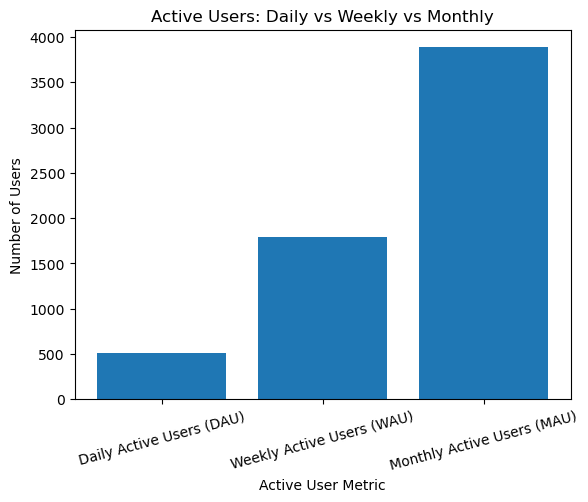

In [13]:
user_counts = {
    "Daily Active Users (DAU)": avg_aud,
    "Weekly Active Users (WAU)": avg_auw,
    "Monthly Active Users (MAU)": avg_aum
}

# Plot
plt.bar(user_counts.keys(), user_counts.values())

# Labels and title
plt.ylabel("Number of Users")
plt.xlabel("Active User Metric")
plt.title("Active Users: Daily vs Weekly vs Monthly")

# Rotate x-axis labels a bit for readability
plt.xticks(rotation=15)

plt.show()

In [14]:
#engagement metric

md = (avg_aud / avg_aum)*100 
print(f'{round(md,2)}% of monthly users are active on a typical day') 

mw = (avg_auw / avg_aum)*100 
print(f'{round(mw,2)}% of monthly users engage at least once a week.') 

13.08% of monthly users are active on a typical day
45.98% of monthly users engage at least once a week.


DH has a loyal core of repeat users (since DAU isn’t too small compared to MAU).

But many users are not daily actives → they come back once a week or a few times a month.

This pattern is typical for products that don’t need daily use (e.g. e-commerce, travel booking, finance apps), but less typical for “daily habit” apps (e.g. messaging, social media).

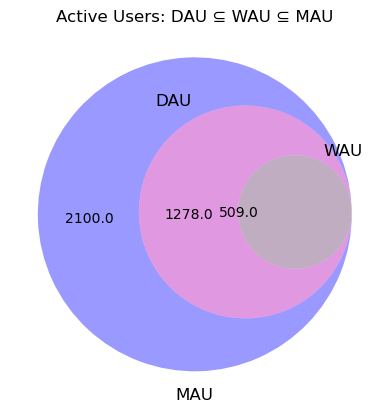

In [15]:


# Example values
DAU = round(avg_aud,0)
WAU = round(avg_auw,0)
MAU = round(avg_aum,0)

# Define subsets for nested sets: DAU ⊆ WAU ⊆ MAU
# Format: (100, 010, 110, 001, 101, 011, 111)
# Each digit represents membership in (A, B, C).
# Here: DAU (A), WAU (B), MAU (C)
subsets = (
    0,               # DAU only
    0,               # WAU only
    0,               # DAU & WAU only
    round((MAU - WAU),0),       # MAU only
    round((WAU - DAU),0),       # WAU & MAU only
    0,               # DAU & MAU only
    DAU              # DAU & WAU & MAU
)

# Create Venn diagram
venn = venn3(subsets=subsets, set_labels=('DAU', 'WAU', 'MAU'))

# Title
plt.title("Active Users: DAU ⊆ WAU ⊆ MAU")

# Show chart
plt.show()


In [16]:
# 2. Sessions per User (avg. number of distinct sessions per customer)

sessions_per_user = (
    df.groupby("customer_code")["session_id"].nunique().mean()
)

print(f'average of {round(sessions_per_user,2)} sessions per user')

average of 5.12 sessions per user


In [17]:
# 3. Session Duration (per session_id: max - min timestamp)
session_duration = (
    df.groupby("session_id")["event_timestamp"]
    .agg(["min", "max"])
    .assign(duration=lambda x: (x["max"] - x["min"]).dt.total_seconds())
    ["duration"]
)

In [18]:
display(session_duration)

session_id
1704985179175.677090654565277300.w4b4duejuj      0.000
1707604721625.9641011183.dkgfweqflp              0.112
1707760698797.423464515889395248.gPI61HYCAx      0.015
1707969935098.754481114407641958.T3f5vt0JCg      0.008
1708280266894.555118988122065672.J894oMgOsp      0.000
                                                ...   
1711924197418.5024421963.mjvcemvcfn             20.821
1711924247669.885275715567950812.P3RhPt5p3I    484.049
1711924320833.926027815238629398.mgOM8cz9Op     68.031
1711924981216.118082073992390482.Wf0BRfvCkv    644.445
1711925085361.716292259757040994.kYFQ1CIozk      3.979
Name: duration, Length: 19901, dtype: float64

In [19]:
print(session_duration.mean())

448.4968563388775


In [20]:
print("Extended statistics of session_duration:")
s = session_duration.copy()
print(f"Mean:      {s.mean():.2f}")
print(f"Median:    {s.median():.2f}")
print(f"Mode:      {s.mode().tolist()}")
print(f"Variance:  {s.var():.2f}")
print(f"Std Dev:   {s.std():.2f}")
print(f"Skewness:  {stats.skew(s):.2f}")
print(f"Kurtosis:  {stats.kurtosis(s):.2f}")

Extended statistics of session_duration:
Mean:      448.50
Median:    142.97
Mode:      [0.0]
Variance:  664201.93
Std Dev:   814.99
Skewness:  4.38
Kurtosis:  33.29


### Values from the extended statistics of session_duration


- Mean = 448.50
The average session lasts ~449 seconds.

- Median = 142.97
The middle user session is much shorter (~143 seconds).
This gap between mean and median means a few very long sessions are pulling the average up.

- Mode = [0.0]
The most common session length is 0 → many users drop off instantly (no meaningful session).

- Variance = 664,201.93

- Standard Deviation = 814.99
There’s huge spread in the data. Sessions are all over the place in length.

- Skewness = 4.38
Positive skew → long right tail.
Most sessions are short, but a small number are extremely long.
(For context: skew > 1 is highly skewed; 4.38 is very skewed.)

- Kurtosis = 33.29
Extremely high kurtosis (normal distribution is ~3).
Means the distribution has very heavy tails: lots of extreme outliers (very long sessions).

### Interpretation

The majority of sessions are short (median ≈ 143, mode = 0).

The average looks large (≈ 449) because a small number of super long sessions drag it up.

Distribution is not normal at all → it’s highly skewed and heavy-tailed.

Those extreme long sessions may be outliers or special user behavior (e.g., someone leaving the app open).

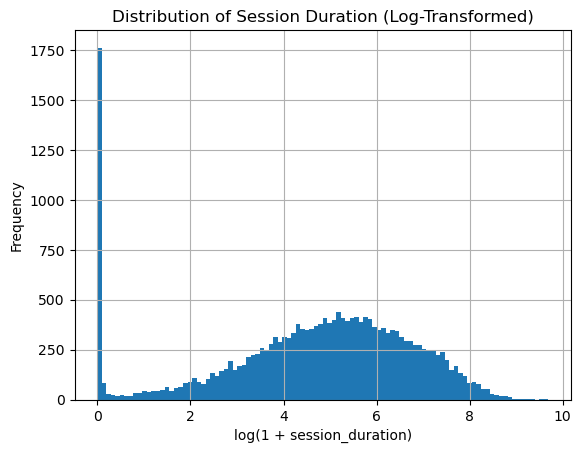

In [21]:
# Log-transform session_duration (adding 1 to avoid log(0) issues)
log_session_duration = np.log1p(session_duration)

# Plot histogram of the log-transformed values
log_session_duration.hist(bins=100)
plt.xlabel("log(1 + session_duration)")
plt.ylabel("Frequency")
plt.title("Distribution of Session Duration (Log-Transformed)")
plt.show()

In [22]:
# 4. Event Frequency (count of each event_action)
event_frequency = df["event_action"].value_counts()

print(event_frequency)

event_action
product_impressions.loaded    2142364
add_cart.clicked                28135
product_choice.opened           12470
Name: count, dtype: int64


In [23]:
type(event_frequency)

pandas.core.series.Series

In [24]:
print(event_frequency.iloc[0])

2142364


In [25]:
# Example event counts
impressions = event_frequency.iloc[0]
add_cart = event_frequency.iloc[1]
product_opened = event_frequency.iloc[2]

# Conversion rates
conv_add_cart = add_cart / impressions * 100
conv_product_opened = product_opened / impressions * 100

print(f"Conversion rate (Impressions → Add to Cart): {conv_add_cart:.2f}%")
print(f"Conversion rate (Impressions → Product Opened): {conv_product_opened:.2f}%")


Conversion rate (Impressions → Add to Cart): 1.31%
Conversion rate (Impressions → Product Opened): 0.58%


## Insights

Tiny conversion from impressions

Less than 2% of impressions result in any deeper interaction.

Most users just view listings and drop off.

Unusual behavior

Add-to-cart (28K) > product detail opens (12K).

This means many users add directly from the listing page → they trust the info shown there or want to move fast.

In [26]:
# 5. Click-through Rate (CTR = #clicks / #impressions)
clicks = df["is_clicked"].sum()
impressions = len(df)   # assuming each row = an impression
ctr = clicks / impressions if impressions > 0 else 0

print(f'\nClick-Through Rate (CTR):{ctr*100: .3}%')


Click-Through Rate (CTR): 1.38%


In [27]:
# Ensure order_placed_at is datetime
df_orders['order_placed_at'] = pd.to_datetime(df_orders['order_placed_at'])

In [28]:
# -----------------------------
# 1️⃣ Order Volume & Value
total_orders = len(df_orders)
orders_per_customer = df_orders.groupby('customer_code')['order_id'].nunique().reset_index(name='orders_count')
avg_qty_per_order = df_orders['qty_ordered'].mean()
failed_orders_rate = df_orders['is_failed'].mean() if 'is_failed' in df_orders.columns else None
cancelled_orders_rate = df_orders['is_cancelled'].mean() if 'is_cancelled' in df_orders.columns else None
voucher_usage_rate = df_orders['is_voucher'].mean() if 'is_voucher' in df_orders.columns else None
free_delivery_rate = df_orders['is_free_delivery'].mean() if 'is_free_delivery' in df_orders.columns else None


In [29]:
# 2️⃣ Payment & Transaction Metrics
if 'payment_method' in df_orders.columns:
    payment_method_dist = df_orders['payment_method'].value_counts(normalize=True)
    voucher_payment_interaction = df_orders.groupby('payment_method')['is_voucher'].mean().reset_index(name='voucher_rate') \
        if 'is_voucher' in df_orders.columns else pd.DataFrame()
else:
    payment_method_dist = pd.Series(dtype='float')
    voucher_payment_interaction = pd.DataFrame()


In [30]:
# 3️⃣ Fulfillment Metrics
sent_orders_rate = df_orders['is_sent'].mean() if 'is_sent' in df_orders.columns else None
delivery_state_dist = df_orders['delivery_state'].value_counts(dropna=False) if 'delivery_state' in df_orders.columns else pd.Series(dtype='int')
failure_owner_counts = df_orders['failure_owner'].value_counts(dropna=False) if 'failure_owner' in df_orders.columns else pd.Series(dtype='int')


In [31]:
# 4️⃣ Customer Behavior Metrics
repeat_customers = orders_per_customer[orders_per_customer['orders_count'] > 1]['customer_code'].nunique()
new_customers = orders_per_customer[orders_per_customer['orders_count'] == 1]['customer_code'].nunique()
avg_orders_per_customer = orders_per_customer['orders_count'].mean()
orders_per_day = df_orders.groupby(df_orders['order_placed_at'].dt.date)['order_id'].nunique().reset_index(name='orders_count')


In [32]:
# 5️⃣ Operational / Risk Metrics
if 'payment_method' in df_orders.columns and 'is_failed' in df_orders.columns:
    failure_by_payment = df_orders.groupby('payment_method')['is_failed'].mean().reset_index(name='failure_rate')
else:
    failure_by_payment = pd.DataFrame()

if 'delivery_state' in df_orders.columns and 'is_cancelled' in df_orders.columns:
    cancellation_by_state = df_orders.groupby('delivery_state')['is_cancelled'].mean().reset_index(name='cancel_rate')
else:
    cancellation_by_state = pd.DataFrame()

if 'is_voucher' in df_orders.columns and 'is_sent' in df_orders.columns:
    voucher_effectiveness = df_orders.groupby('is_voucher')['is_sent'].mean().reset_index(name='sent_rate')
else:
    voucher_effectiveness = pd.DataFrame()

In [33]:
# 6️⃣ Time-Based Metrics
orders_per_hour = df_orders.groupby(df_orders['order_placed_at'].dt.hour)['order_id'].nunique().reset_index(name='orders_count')

In [34]:
# print summary
print("Total Orders:", total_orders)
print("Average Quantity per Order:", avg_qty_per_order)
print("Failed Orders Rate:", failed_orders_rate)
print("Cancelled Orders Rate:", cancelled_orders_rate)
print("Voucher Usage Rate:", voucher_usage_rate)
print("Free Delivery Rate:", free_delivery_rate)

print("\nPayment Method Distribution:")
print(payment_method_dist)

print("\nSent Orders Rate:", sent_orders_rate)
print("\nTop Delivery States:")
print(delivery_state_dist.head())

print("\nRepeat Customers:", repeat_customers)
print("New Customers:", new_customers)
print("Average Orders per Customer:", avg_orders_per_customer)


Total Orders: 328632
Average Quantity per Order: 1.745380851529979
Failed Orders Rate: 0.0
Cancelled Orders Rate: 0.031238589060103704
Voucher Usage Rate: 0.23076267679349546
Free Delivery Rate: 0.19892767594147862

Payment Method Distribution:
payment_method
cash                      0.567160
card                      0.214328
generic_creditcard        0.164686
antfinancial_easypaisa    0.025308
balance                   0.015680
jazzcash_wallet           0.010659
corporate_invoice         0.001780
voucher                   0.000399
Name: proportion, dtype: float64

Sent Orders Rate: 0.9687614109398963

Top Delivery States:
delivery_state
early     130431
late      101299
ontime     86072
NaN        10830
Name: count, dtype: int64

Repeat Customers: 5824
New Customers: 4176
Average Orders per Customer: 7.7141


### Order Metrics

Total Orders = 328,632 → strong order volume.

Average Quantity per Order = ~1.75 → customers typically order fewer than 2 items per transaction (low basket size).

Failed Orders Rate = 0.0% → excellent reliability in order completion.

Cancelled Orders Rate = ~3.1% → relatively low, but worth investigating cancellation reasons (payment issues? customer indecision?).

Sent Orders Rate = ~96.9% → aligns with the low cancellation rate.

Takeaway: Operational reliability is high, but basket size is small.

### Promotions & Incentives

Voucher Usage Rate = ~23% → nearly 1 in 4 orders use a discount voucher.

Free Delivery Rate = ~19.9% → about 1 in 5 orders rely on free delivery promos.

Takeaway: A significant share of demand is promo-driven → may reduce margins. Need to track net profitability after discounts.

### Payment Behavior

Cash = 56.7% → majority still pay with cash (COD).

Cards = 21.4%, Generic Credit Card = 16.5% → ~38% total card-based.

Digital wallets (Easypaisa, JazzCash, Balance) = ~5%.

Corporate invoice & voucher = negligible.

Takeaway: Cash dominates → potential risks (cash handling, cancellations, refund costs). Opportunity to push digital payments for better unit economics.

### Delivery Performance

Early = 130,431 (40%)

Late = 101,299 (31%)

On time = 86,072 (26%)

NaN = 10,830 (3%)

Takeaway:

Only ~26% on time → delivery punctuality needs improvement.

Early deliveries dominate, which is usually fine, but 31% late is significant → customer satisfaction risk.

### Customer Behavior

Repeat Customers = 5,824

New Customers = 4,176

Average Orders per Customer = 7.7

Takeaway:

Customer base is loyal — avg 7.7 orders/customer is strong retention.

More repeat than new customers in this snapshot → growth is coming from existing base, not new acquisition.

But new customer acquisition (4,176) seems relatively low vs total orders — suggests order volume is concentrated among repeat customers.

### Strategic Insights

Retention is strong, but growth may need better acquisition channels.

Heavy promo reliance (23% vouchers, 20% free delivery) → great for demand stimulation, but risky for margins long-term.

Payment mix shows dependency on cash → opportunity to incentivize wallet/card use (loyalty points, cashback, etc.).

Delivery punctuality is a pain point → with 31% late, customer satisfaction & churn risk is high.

Basket size (~1.75 items/order) → opportunity for upselling/cross-selling (e.g., "Add a drink/dessert" prompts).